In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
test_file = pd.read_csv("Data/test.csv")
train_file = pd.read_csv("Data/train.csv")

In [3]:
train_file.head(10)

#columns:
#passengerid, pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_file = train_file.drop(columns = ['PassengerId'])

In [5]:
#checking the survived feature
train_file['Survived'].unique()

array([0, 1])

Text(0.5, 1.0, 'Survived')

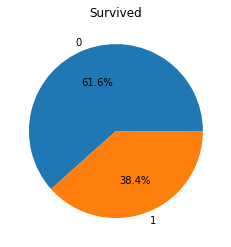

In [6]:
plt.pie(train_file['Survived'].value_counts(), labels=train_file['Survived'].value_counts().index, autopct='%1.1f%%')
plt.title("Survived")

#we can clearly see that most people died

Text(0.5, 1.0, 'Survived by Age')

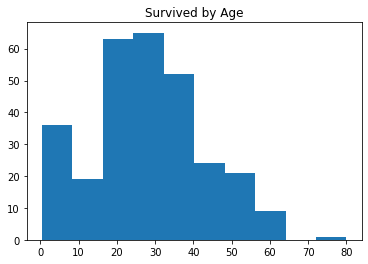

In [7]:
survived = train_file[train_file['Survived'] == 1]

plt.hist(survived['Age'])
plt.title("Survived by Age")
#the most people who survived was between 17~40 years old

In [8]:
#now we are gonna do the same, but using the "Sex" column
#but first we need to transform it in a numerical feature

from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
sex_column_encoded = encoder.fit_transform(train_file['Sex'])

train_file['Sex'] = sex_column_encoded

#test data
encoder_test = preprocessing.LabelEncoder()
sex_column_encoded = encoder_test.fit_transform(test_file['Sex'])

test_file['Sex'] = sex_column_encoded

In [9]:
#1 = male
#0 = female

train_file.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


Text(0.5, 1.0, 'Survived by Sex')

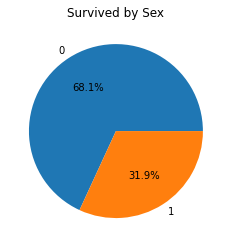

In [10]:
survived = train_file[train_file['Survived'] == 1]

plt.pie(survived['Sex'].value_counts(), labels=survived['Sex'].value_counts().index, autopct='%1.1f%%')
plt.title("Survived by Sex")

#most of the survivors are women

(array([17.,  5., 11., 29., 13.,  9.,  6.,  2.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

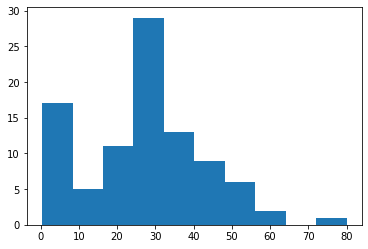

In [11]:
men_survived = survived[survived['Sex'] == 1]
plt.hist(men_survived['Age'])

#the males who most survived were between 27~31 years old

(array([17.,  4., 32., 34., 32., 32., 17., 13.,  9.,  7.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <BarContainer object of 10 artists>)

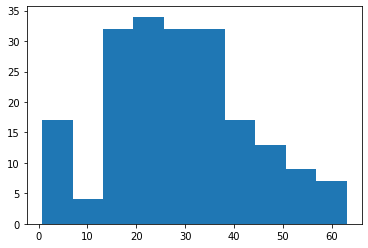

In [12]:
men_survived = survived[survived['Sex'] == 0]
plt.hist(men_survived['Age'])

#the females who most survived were between 13~37 years old

Text(0.5, 1.0, 'Pclass values')

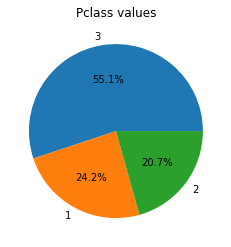

In [13]:
#lets check the pclass

plt.pie(train_file['Pclass'].value_counts(), labels=train_file['Pclass'].value_counts().index, autopct="%1.1f%%")
plt.title("Pclass values")

#we have tree possible values for pclass: 1, 2 and 3

Text(0.5, 1.0, 'Survived by Pclass')

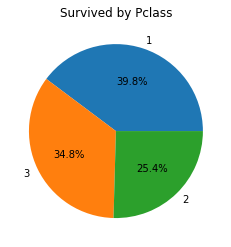

In [14]:
plt.pie(survived['Pclass'].value_counts(), labels=survived['Pclass'].value_counts().index, autopct="%1.1f%%")
plt.title("Survived by Pclass")

#almost 40% of the survivors was from the pclass 1
#and 35% from pclass 3
#so passengers from that class have a bigger chance to survive

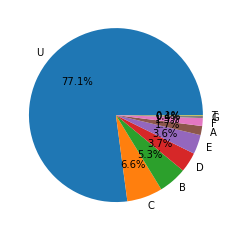

In [15]:
#U for Unknown
train_file['Cabin'].fillna("U", inplace=True)

#we are going to pick only the letter of the cabin
#so we can see how many cabins had (A, B, C, D, E, F, G, U(Unknown cabin))
train_file['Cabin'] = train_file['Cabin'].str[0]

plt.pie(train_file['Cabin'].value_counts(), labels=train_file['Cabin'].value_counts().index, autopct="%1.1f%%")

#test data

test_file['Cabin'].fillna("U", inplace=True)
test_file['Cabin'] = test_file['Cabin'].str[0]

In [16]:
cabin_dummies = pd.get_dummies(train_file['Cabin'], prefix="Cabin")

train_file = pd.concat([train_file, cabin_dummies], axis=1)

#dropping the old unformated 'cabin' column
train_file = train_file.drop(columns=['Cabin'])

#test data
cabin_dummies_test = pd.get_dummies(test_file['Cabin'], prefix="Cabin")

test_file = pd.concat([test_file, cabin_dummies_test], axis=1)

#dropping the old unformated 'cabin' column
test_file = test_file.drop(columns=['Cabin'])

In [17]:
#let's see the ticket column

train_file['Ticket'].value_counts()

#we have almost 700 unique values, so probably it is not worth it use it
#let's drop it
 
train_file = train_file.drop(columns=['Ticket'])
test_file = test_file.drop(columns=['Ticket'])

Text(0.5, 1.0, 'Embarked values')

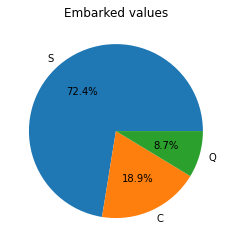

In [18]:
#now let's check the 'embarked' column

plt.pie(train_file['Embarked'].value_counts(), labels=train_file['Embarked'].value_counts().index, autopct="%1.1f%%")
plt.title("Embarked values")

# S = Southampton
# C = Cherbourg
# Q = Queenstown

Text(0.5, 1.0, 'Survived by Embarked')

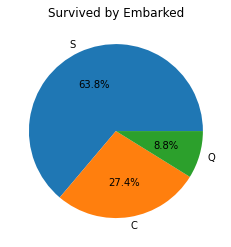

In [19]:
plt.pie(survived['Embarked'].value_counts(), labels=survived['Embarked'].value_counts().index, autopct="%1.1f%%")
plt.title("Survived by Embarked")

#almost 64% of the survivors were from the Embarked S (Southampton)

In [20]:
#let's check the sibsp and parch columns
#sibsp = # of siblings / spouses aboard the Titanic
#parch = # of parents / children aboard the Titanic

train_file[['SibSp', 'Parch']].isnull().sum()

SibSp    0
Parch    0
dtype: int64

(array([[608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.],
        [678., 118.,  80.,   5.,   0.,   4.,   5.,   1.,   0.,   0.]]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 2 BarContainer objects>)

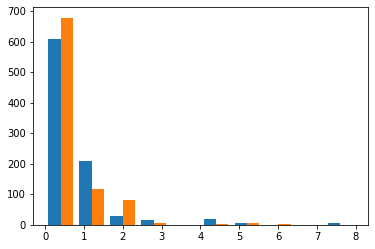

In [21]:
plt.hist(train_file[['SibSp', 'Parch']])

In [22]:
train_file['RelativesOnboard'] = train_file['SibSp'] + train_file['Parch']
train_file.drop(columns=['SibSp', 'Parch'], inplace=True)

#test data
test_file['RelativesOnboard'] = test_file['SibSp'] + test_file['Parch']
test_file.drop(columns=['SibSp', 'Parch'], inplace=True)

In [23]:
train_file['isAlone'] = np.where(train_file['RelativesOnboard'] > 0, 0, 1)
train_file.drop(columns=['RelativesOnboard'], inplace=True)
train_file.head(10)

#test data
test_file['isAlone'] = np.where(test_file['RelativesOnboard'] > 0, 0, 1)
test_file.drop(columns=['RelativesOnboard'], inplace=True)
test_file.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,RelativesOnboard,isAlone
0,892,3,"Kelly, Mr. James",1,34.5,7.8292,Q,0,0,0,0,0,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,7.0000,S,0,0,0,0,0,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,9.6875,Q,0,0,0,0,0,0,0,1,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,8.6625,S,0,0,0,0,0,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,12.2875,S,0,0,0,0,0,0,0,1,2,0
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,9.2250,S,0,0,0,0,0,0,0,1,0,1
6,898,3,"Connolly, Miss. Kate",0,30.0,7.6292,Q,0,0,0,0,0,0,0,1,0,1
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,29.0000,S,0,0,0,0,0,0,0,1,2,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,7.2292,C,0,0,0,0,0,0,0,1,0,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,24.1500,S,0,0,0,0,0,0,0,1,2,0


In [24]:
#let's check the 'fare' columnn

train_file['Fare'].isnull().sum()

0

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

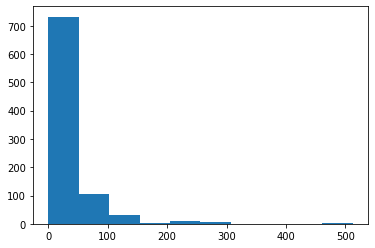

In [25]:
plt.hist(train_file['Fare'])

In [26]:
#let's check the 'name' column

train_file[['Last_Name', 'First_Name']] = train_file['Name'].str.split(',', expand=True)
train_file.drop(columns=['Last_Name', 'Name'], inplace=True)

train_file.head(10)

#test data
test_file[['Last_Name', 'First_Name']] = test_file['Name'].str.split(',', expand=True)
test_file.drop(columns=['Last_Name', 'Name'], inplace=True)

In [27]:
train_file[['Title', 'Full_Name']] = train_file['First_Name'].str.split('.', 1, expand=True)
train_file.drop(columns=['Full_Name', 'First_Name'], inplace=True)

train_file.head(10)

#test data
test_file[['Title', 'Full_Name']] = test_file['First_Name'].str.split('.', 1, expand=True)
test_file.drop(columns=['Full_Name', 'First_Name'], inplace=True)

Text(0.5, 1.0, "Title's values")

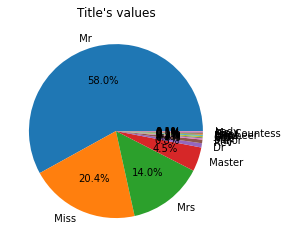

In [28]:
plt.pie(train_file['Title'].value_counts(), labels=train_file['Title'].value_counts().index, autopct="%1.1f%%")
plt.title("Title's values")

In [29]:
train_file['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Don               1
 Jonkheer          1
 Mme               1
 Capt              1
 the Countess      1
 Sir               1
 Ms                1
 Lady              1
Name: Title, dtype: int64

Text(0.5, 1.0, 'Survived by Title')

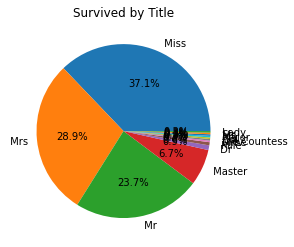

In [30]:
survived = train_file[train_file['Survived'] == 1]
plt.pie(survived['Title'].value_counts(), labels=survived['Title'].value_counts().index, autopct="%1.1f%%")
plt.title("Survived by Title")

#more than 66% of the survivores had a "miss" or "mrs" title (female title)
#more than 30% of the survivores had a "mr" or "master" title (male title)

In [31]:
'''
 Mr              515
 Miss            181
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Ms                1
 Sir               1
 Don               1
 Capt              1
 the Countess      1
 Mme               1
 Jonkheer          1
 Lady              1
'''

train_file['Title'].replace([' Dr', ' Rev', ' Major', ' Mlle', ' Col', ' Ms', ' Sir',
                    ' Don', ' Capt', ' the Countess', ' Mme', ' Jonkheer', ' Lady'], ' Others', inplace=True)

#test data
test_file['Title'].replace([' Dr', ' Rev', ' Major', ' Mlle', ' Col', ' Ms', ' Sir',
                    ' Don', ' Capt', ' the Countess', ' Mme', ' Jonkheer', ' Lady'], ' Others', inplace=True)

Text(0.5, 1.0, "Title's values")

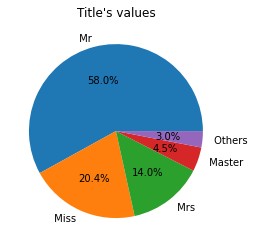

In [32]:
plt.pie(train_file['Title'].value_counts(), labels=train_file['Title'].value_counts().index, autopct="%1.1f%%")
plt.title("Title's values")

In [33]:
train_file.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,RelativesOnboard,isAlone,Title
0,0,3,1,22.0,7.2500,S,0,0,0,0,0,0,0,0,1,1,0,Mr
1,1,1,0,38.0,71.2833,C,0,0,1,0,0,0,0,0,0,1,0,Mrs
2,1,3,0,26.0,7.9250,S,0,0,0,0,0,0,0,0,1,0,1,Miss
3,1,1,0,35.0,53.1000,S,0,0,1,0,0,0,0,0,0,1,0,Mrs
4,0,3,1,35.0,8.0500,S,0,0,0,0,0,0,0,0,1,0,1,Mr
5,0,3,1,NaN,8.4583,Q,0,0,0,0,0,0,0,0,1,0,1,Mr
6,0,1,1,54.0,51.8625,S,0,0,0,0,1,0,0,0,0,0,1,Mr
7,0,3,1,2.0,21.0750,S,0,0,0,0,0,0,0,0,1,4,0,Master
8,1,3,0,27.0,11.1333,S,0,0,0,0,0,0,0,0,1,2,0,Mrs
9,1,2,0,14.0,30.0708,C,0,0,0,0,0,0,0,0,1,1,0,Mrs


In [34]:
#lets check to see if we find some nan values

train_file.isnull().sum()

Survived              0
Pclass                0
Sex                   0
Age                 177
Fare                  0
Embarked              2
Cabin_A               0
Cabin_B               0
Cabin_C               0
Cabin_D               0
Cabin_E               0
Cabin_F               0
Cabin_G               0
Cabin_T               0
Cabin_U               0
RelativesOnboard      0
isAlone               0
Title                 0
dtype: int64

In [35]:
mode = train_file['Embarked'].mode()[0]

train_file['Embarked'].fillna(mode, inplace=True)

#test data
mode_test = test_file['Embarked'].mode()[0]

test_file['Embarked'].fillna(mode_test, inplace=True)

In [36]:
train_file.isnull().sum()

Survived              0
Pclass                0
Sex                   0
Age                 177
Fare                  0
Embarked              0
Cabin_A               0
Cabin_B               0
Cabin_C               0
Cabin_D               0
Cabin_E               0
Cabin_F               0
Cabin_G               0
Cabin_T               0
Cabin_U               0
RelativesOnboard      0
isAlone               0
Title                 0
dtype: int64

In [37]:
man = train_file[train_file['Sex'] == 1]
man_median = man['Age'].median()

woman = train_file[train_file['Sex'] == 0]
woman_median = woman['Age'].median()

np.where(train_file['Sex'] == 1,
         train_file['Age'].fillna(man_median, inplace=True),
         train_file['Age'].fillna(woman_median, inplace=True))

#test data
man_test = test_file[test_file['Sex'] == 1]
man_median_test = man_test['Age'].median()

woman_test = test_file[test_file['Sex'] == 0]
woman_median_test = woman_test['Age'].median()

np.where(test_file['Sex'] == 1,
         test_file['Age'].fillna(man_median_test, inplace=True),
         test_file['Age'].fillna(woman_median_test, inplace=True))

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, No

In [38]:
train_file['CategoricalAge'] = pd.cut(train_file['Age'], 4)

#test data
test_file['CategoricalAge'] = pd.cut(test_file['Age'], 4)

In [39]:
train_file.isnull().sum()

Survived            0
Pclass              0
Sex                 0
Age                 0
Fare                0
Embarked            0
Cabin_A             0
Cabin_B             0
Cabin_C             0
Cabin_D             0
Cabin_E             0
Cabin_F             0
Cabin_G             0
Cabin_T             0
Cabin_U             0
RelativesOnboard    0
isAlone             0
Title               0
CategoricalAge      0
dtype: int64

In [40]:
train_file.describe()

,Survived,Pclass,Sex,Age,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,RelativesOnboard,isAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.560236,32.204208,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044,0.904602,0.602694
std,0.486592,0.836071,0.477990,13.005010,49.693429,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397,1.613459,0.489615
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


In [41]:
train_file['CategoricalAge']

0      (20.315, 40.21]
1      (20.315, 40.21]
2      (20.315, 40.21]
3      (20.315, 40.21]
4      (20.315, 40.21]
            ...       
886    (20.315, 40.21]
887     (0.34, 20.315]
888    (20.315, 40.21]
889    (20.315, 40.21]
890    (20.315, 40.21]
Name: CategoricalAge, Length: 891, dtype: category
Categories (4, interval[float64]): [(0.34, 20.315] < (20.315, 40.21] < (40.21, 60.105] < (60.105, 80.0]]

In [42]:
#Mapping Age column

train_file.loc[ train_file['CategoricalAge'] == '[(0.34, 20.315]', 'Age'] = 0
train_file.loc[ train_file['CategoricalAge'] == '(20.315, 40.21]', 'Age'] = 1
train_file.loc[ train_file['CategoricalAge'] == '(40.21, 60.105]', 'Age'] = 2
train_file.loc[ train_file['CategoricalAge'] == '(60.105, 80.0]', 'Age'] = 3

train_file.drop(columns = ["CategoricalAge"], inplace=True)

#Test data

test_file.loc[ test_file['CategoricalAge'] == '[(0.34, 20.315]', 'Age'] = 0
test_file.loc[ test_file['CategoricalAge'] == '(20.315, 40.21]', 'Age'] = 1
test_file.loc[ test_file['CategoricalAge'] == '(40.21, 60.105]', 'Age'] = 2
test_file.loc[ test_file['CategoricalAge'] == '(60.105, 80.0]', 'Age'] = 3

test_file.drop(columns = ["CategoricalAge"], inplace=True)

In [43]:
train_file.dtypes

Survived              int64
Pclass                int64
Sex                   int64
Age                 float64
Fare                float64
Embarked             object
Cabin_A               uint8
Cabin_B               uint8
Cabin_C               uint8
Cabin_D               uint8
Cabin_E               uint8
Cabin_F               uint8
Cabin_G               uint8
Cabin_T               uint8
Cabin_U               uint8
RelativesOnboard      int64
isAlone               int64
Title                object
dtype: object

In [44]:
#title dummies

title_dummies = pd.get_dummies(train_file['Title'], prefix='Title')
train_file = pd.concat([train_file, title_dummies], axis=1)
train_file.drop(columns=['Title'], inplace=True)
train_file.head(10)

#test data
title_dummies_test = pd.get_dummies(test_file['Title'], prefix='Title')
test_file = pd.concat([test_file, title_dummies_test], axis=1)
test_file.drop(columns=['Title'], inplace=True)
test_file.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Cabin_G,Cabin_U,RelativesOnboard,isAlone,Title_ Dona,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Others
0,892,3,1,34.5,7.8292,Q,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,893,3,0,47.0,7.0000,S,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,894,2,1,62.0,9.6875,Q,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,895,3,1,27.0,8.6625,S,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,896,3,0,22.0,12.2875,S,0,0,0,0,...,0,1,2,0,0,0,0,0,1,0
5,897,3,1,14.0,9.2250,S,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
6,898,3,0,30.0,7.6292,Q,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
7,899,2,1,26.0,29.0000,S,0,0,0,0,...,0,1,2,0,0,0,0,1,0,0
8,900,3,0,18.0,7.2292,C,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
9,901,3,1,21.0,24.1500,S,0,0,0,0,...,0,1,2,0,0,0,0,1,0,0


In [45]:
#embarked dummies

title_dummies = pd.get_dummies(train_file['Embarked'], prefix='Embarked')
train_file = pd.concat([train_file, title_dummies], axis=1)
train_file.drop(columns=['Embarked'], inplace=True)
train_file.head(10)

#test data

title_dummies_test = pd.get_dummies(test_file['Embarked'], prefix='Embarked')
test_file = pd.concat([test_file, title_dummies_test], axis=1)
test_file.drop(columns=['Embarked'], inplace=True)

In [46]:
train_file.dtypes

Survived              int64
Pclass                int64
Sex                   int64
Age                 float64
Fare                float64
Cabin_A               uint8
Cabin_B               uint8
Cabin_C               uint8
Cabin_D               uint8
Cabin_E               uint8
Cabin_F               uint8
Cabin_G               uint8
Cabin_T               uint8
Cabin_U               uint8
RelativesOnboard      int64
isAlone               int64
Title_ Master         uint8
Title_ Miss           uint8
Title_ Mr             uint8
Title_ Mrs            uint8
Title_ Others         uint8
Embarked_C            uint8
Embarked_Q            uint8
Embarked_S            uint8
dtype: object

In [47]:
train_file.isnull().sum()

Survived            0
Pclass              0
Sex                 0
Age                 0
Fare                0
Cabin_A             0
Cabin_B             0
Cabin_C             0
Cabin_D             0
Cabin_E             0
Cabin_F             0
Cabin_G             0
Cabin_T             0
Cabin_U             0
RelativesOnboard    0
isAlone             0
Title_ Master       0
Title_ Miss         0
Title_ Mr           0
Title_ Mrs          0
Title_ Others       0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

X = train_file.drop(columns=['Survived'])
y = train_file['Survived']
accuracies = []
models = []

X.head(10)

,Pclass,Sex,Age,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,...,RelativesOnboard,isAlone,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Others,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,7.2500,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,1,0,38.0,71.2833,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,3,0,26.0,7.9250,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,35.0,53.1000,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,3,1,35.0,8.0500,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
5,3,1,29.0,8.4583,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
6,1,1,54.0,51.8625,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
7,3,1,2.0,21.0750,0,0,0,0,0,0,...,4,0,1,0,0,0,0,0,0,1
8,3,0,27.0,11.1333,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,1
9,2,0,14.0,30.0708,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [49]:
test_file.isnull().sum()

PassengerId         0
Pclass              0
Sex                 0
Age                 0
Fare                1
Cabin_A             0
Cabin_B             0
Cabin_C             0
Cabin_D             0
Cabin_E             0
Cabin_F             0
Cabin_G             0
Cabin_U             0
RelativesOnboard    0
isAlone             0
Title_ Dona         0
Title_ Master       0
Title_ Miss         0
Title_ Mr           0
Title_ Mrs          0
Title_ Others       0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
dtype: int64

In [50]:
test_file['Fare'].fillna(test_file['Fare'].median(), inplace=True)

In [51]:
train_file['CategoricalFare'] = pd.cut(train_file['Fare'], 4)

#test data
test_file['CategoricalFare'] = pd.cut(test_file['Fare'], 4)

In [52]:
test_file['CategoricalFare']

0      (-0.512, 128.082]
1      (-0.512, 128.082]
2      (-0.512, 128.082]
3      (-0.512, 128.082]
4      (-0.512, 128.082]
             ...        
413    (-0.512, 128.082]
414    (-0.512, 128.082]
415    (-0.512, 128.082]
416    (-0.512, 128.082]
417    (-0.512, 128.082]
Name: CategoricalFare, Length: 418, dtype: category
Categories (4, interval[float64]): [(-0.512, 128.082] < (128.082, 256.165] < (256.165, 384.247] < (384.247, 512.329]]

In [53]:
#Mapping Age column

train_file.loc[ train_file['CategoricalFare'] == '(-0.647, 1.656]', 'Fare'] = 0
train_file.loc[ train_file['CategoricalFare'] == '(1.656, 3.949]', 'Fare'] = 1
train_file.loc[ train_file['CategoricalFare'] == '(3.949, 6.243]', 'Fare'] = 2
train_file.loc[ train_file['CategoricalFare'] == '(6.243, 8.537]', 'Fare'] = 3

train_file.drop(columns = ["CategoricalFare"], inplace=True)

#Test data

test_file.loc[ test_file['CategoricalFare'] == '(-0.647, 1.656]', 'Fare'] = 0
test_file.loc[ test_file['CategoricalFare'] == '(1.656, 3.949]', 'Fare'] = 1
test_file.loc[ test_file['CategoricalFare'] == '(3.949, 6.243]', 'Fare'] = 2
test_file.loc[ test_file['CategoricalFare'] == '(6.243, 8.537]', 'Fare'] = 3

test_file.drop(columns = ["CategoricalFare"], inplace=True)

<AxesSubplot:>

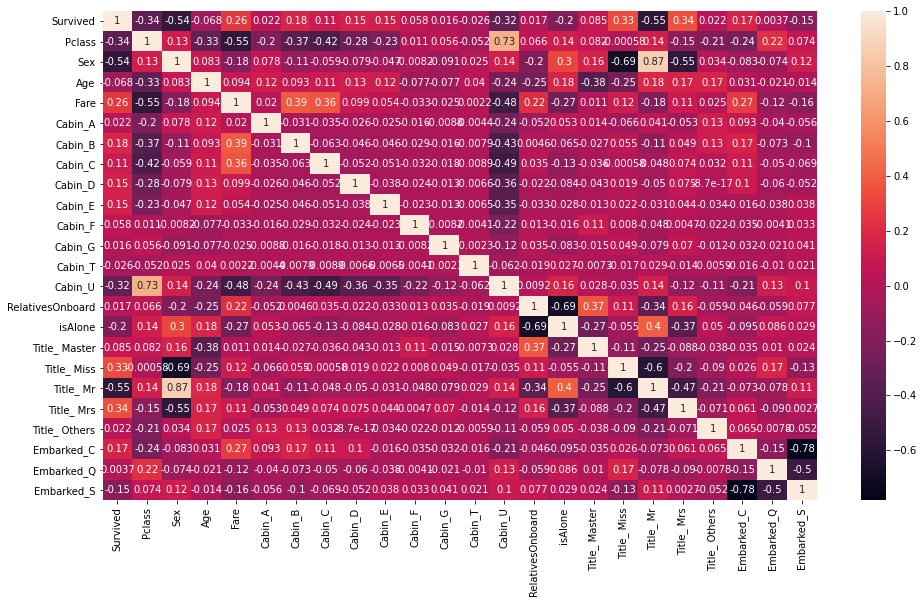

In [54]:
plt.figure(figsize = (16, 9))

sns.heatmap(train_file.corr(), annot=True)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=19) 

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [3, 4, 5, 6, 7],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [4, 6, 8, 10, 12],
    'warm_start': [True, False],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

rf = RandomForestClassifier(random_state = 19)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("Random Forest Classifier")

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits


### SVC

In [57]:
from sklearn.svm import SVC

param_grid = {
    'degree': [1, 2, 3, 4],
    'kernel': ['linear', 'poly', 'rbf']
}

svc = SVC(random_state=19)

grid_svc = GridSearchCV(estimator = svc, param_grid = param_grid,
                        n_jobs = -1, verbose = 2)

grid_svc.fit(X_train, y_train)
best_svc = grid_svc.best_estimator_
y_pred = best_svc.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("SVC")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


### Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10]
}

tree = DecisionTreeClassifier(random_state=19)

grid_tree = GridSearchCV(estimator = tree, param_grid = param_grid,
                         n_jobs = -1, verbose = 2)

grid_tree.fit(X_train, y_train)
best_tree = grid_tree.best_estimator_
y_pred = best_tree.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("Decision Tree Classifier")

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


### K Neighbors Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7]
}

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(estimator = knn, param_grid = param_grid,
                        n_jobs = -1, verbose = 2)

grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
y_pred = best_knn.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("K Neighbors Classifier")

Fitting 5 folds for each of 3 candidates, totalling 15 fits


### XGBoost

In [60]:
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

xgb = XGBClassifier(use_label_encoder=False)

grid_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid,
                        n_jobs = -1, verbose = 2)

grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred = best_xgb.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("XGBoost")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[00:20:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

gradient = GradientBoostingClassifier(random_state=19)

grid_gradient = GridSearchCV(estimator = gradient, param_grid = param_grid,
                             n_jobs = -1, verbose = 2)

grid_gradient.fit(X_train, y_train)
best_gradient = grid_gradient.best_estimator_
y_pred = best_gradient.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("Gradient Boosting Classifier")

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


### Perceptron

In [62]:
from sklearn.linear_model import Perceptron

param_grid = {
    'max_iter': [1000, 1500, 2000],
    'warm_start': [False, True],
    'alpha': [0.0001, 0.00001]
}

perceptron = Perceptron(early_stopping=True, random_state=19)

grid_percep = GridSearchCV(estimator = perceptron, param_grid = param_grid,
                           n_jobs = -1, verbose = 2)

grid_percep.fit(X_train, y_train)
best_perceptron = grid_percep.best_estimator_
y_pred = best_perceptron.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("Perceptron")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


### Stacking Models Classifier

In [63]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('random_forest', best_rf),
    ('svc', best_svc),
    ('decision_tree', best_tree),
    ('knn', best_knn),
    ('xgboost', best_xgb),
    ('gradient_boosting', best_gradient),
    ('perceptron', best_perceptron)
]

stacking_classifier = StackingClassifier(estimators = estimators,
                                         final_estimator = LogisticRegression(random_state=19),
                                         n_jobs = -1)

stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
accuracies.append(round(accuracy_score(y_pred, y_test) * 100, 2))
models.append("Stacking Classifier")

In [64]:
data = pd.DataFrame({"Model": models,
                    "Accuracy": accuracies})

pivot_table = pd.pivot_table(data, index="Model")
pivot_table

,Accuracy
Model,
Decision Tree Classifier,81.34
Gradient Boosting Classifier,89.55
K Neighbors Classifier,75.37
Perceptron,79.85
Random Forest Classifier,85.82
SVC,85.82
Stacking Classifier,85.82
XGBoost,85.07


In [65]:
#we will need to save the passengerid from the train file
#because we are gonna used it to send the submission
passengers_id = test_file['PassengerId']
test_file = test_file.drop(columns = ['PassengerId'])

In [66]:
predictions = grid_gradient.predict(test_file)

submission = pd.DataFrame({'PassengerId': passengers_id,
                           'Survived': predictions})

submission.to_csv("submission_titanic.csv", index=False)